In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [4]:
%matplotlib inline

In [5]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

In [6]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [7]:
classes = [
    'open',
    'close',
    'pointer',
    'thumbs up',
    'thumbs down',
    'horns up',
    'horns down'
]

In [8]:
data = pd.read_csv('../data/keypoints.csv',header=None,names=['label']+list(np.arange(42)))

In [9]:
# extract features, labels
X = data[list(np.arange(2,42))].to_numpy()
y = data['label'].to_numpy()

In [10]:
# split train test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [11]:
# iterate over classifiers
preds = []
scores = []
for name, clf in zip(names, classifiers):
    print(name)
    
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    preds.append(pred)
    
    score = clf.score(X_test, y_test)
    scores.append(score)

Nearest Neighbors
Linear SVM
RBF SVM
Logistic Regression
Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA


In [12]:
pd.Series(scores,index=names).sort_values()

AdaBoost               0.726014
Decision Tree          0.820640
Naive Bayes            0.825256
Random Forest          0.850313
Linear SVM             0.899110
Logistic Regression    0.914276
Neural Net             0.963732
QDA                    0.987471
RBF SVM                0.989779
Nearest Neighbors      0.993076
dtype: float64

In [13]:
# per class accuracy

In [14]:
cms = []
for pred in preds:
    cm=confusion_matrix(y_test,pred)
    cms.append(cm.diagonal()/cm.sum(axis=1))

Text(0, 0.5, 'accuracy')

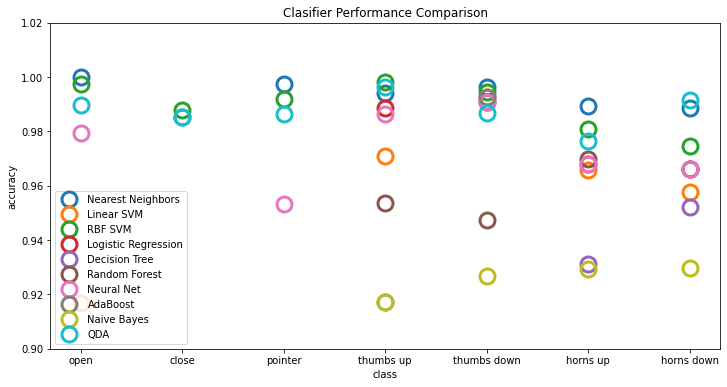

In [15]:
pd.DataFrame(cms,index=names,columns=classes).T.plot(figsize=(12,6),marker='o',linestyle='none',ms=15,markerfacecolor='none',markeredgewidth=3)
plt.gca().set_ylim(.9,1.02)
plt.title('Clasifier Performance Comparison')
plt.xlabel('class')
plt.ylabel('accuracy')

In [16]:
# Fine-tune best performing naive models (nearest neighbors, SVM (RBF kernel), and QDA)

In [17]:
# knn
knn_preds = []
knn_scores = []
for k in range(2,7):
    clf = KNeighborsClassifier(k)
    
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    knn_preds.append(pred)
    
    score = clf.score(X_test, y_test)
    knn_scores.append(score)

In [18]:
pd.Series(knn_scores,index=list(range(2,7))).sort_values()

6    0.988460
5    0.990109
4    0.991098
2    0.993076
3    0.993076
dtype: float64

Text(0.5, 1.0, 'KNN')

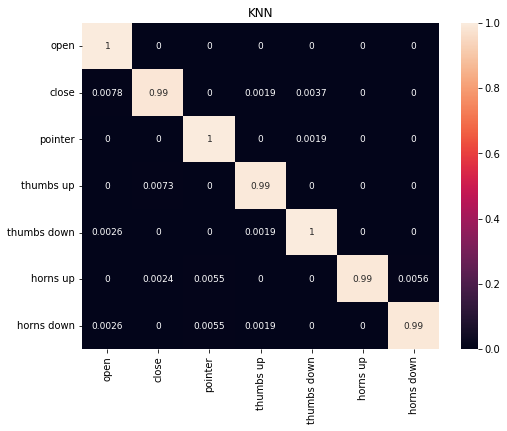

In [19]:
cm_knn = pd.DataFrame(confusion_matrix(y_test,knn_preds[1]),index=classes,columns=classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm_knn/cm_knn.sum(axis=1),annot=True,annot_kws={"size": 9})
plt.title('KNN')

In [20]:
svm_preds = []
svm_scores = []
for c in np.logspace(-3, 3, 5):
    for g in np.logspace(-3, 3, 5):
        clf = SVC(C=c, gamma=g)

        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        svm_preds.append(pred)

        score = clf.score(X_test, y_test)
        svm_scores.append(score)

In [21]:
pd.Series(svm_scores,index=[(c,g) for g in np.logspace(-3, 3, 5) for c in np.logspace(-3, 3, 5)]).sort_values().idxmax()

(1.0, 31.622776601683793)

Text(0.5, 1.0, 'svm')

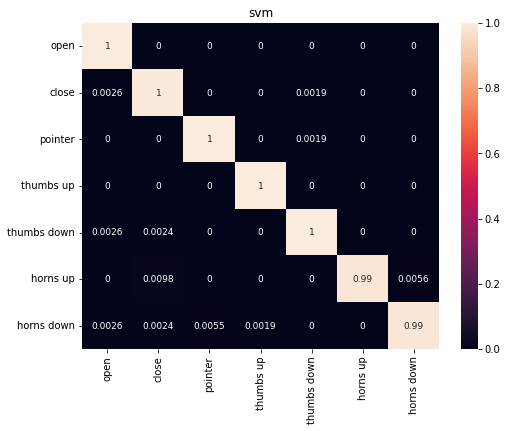

In [22]:
cm_svm = pd.DataFrame(confusion_matrix(y_test,svm_preds[17]),index=classes,columns=classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm/cm_svm.sum(axis=1),annot=True,annot_kws={"size": 9})
plt.title('svm')

In [23]:
qd_preds = []
qd_scores = []
for c in np.linspace(0, 1, 5):
    clf = QuadraticDiscriminantAnalysis()

    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    qd_preds.append(pred)

    score = clf.score(X_test, y_test)
    qd_scores.append(score)

In [24]:
pd.Series(qd_scores,index=list(np.linspace(0,1,5))).sort_values()

0.00    0.987471
0.25    0.987471
0.50    0.987471
0.75    0.987471
1.00    0.987471
dtype: float64

Text(0.5, 1.0, 'qd')

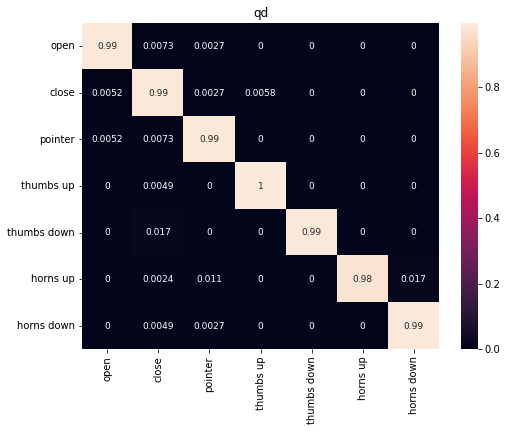

In [25]:
cm_qd = pd.DataFrame(confusion_matrix(y_test,qd_preds[0]),index=classes,columns=classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm_qd/cm_qd.sum(axis=1),annot=True,annot_kws={"size": 9})
plt.title('qd')

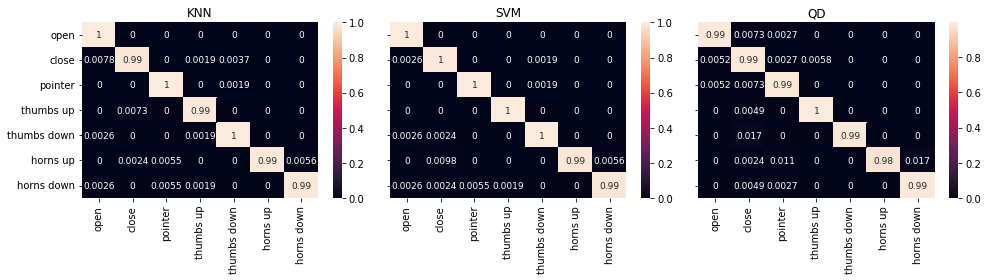

In [26]:
f,axs=plt.subplots(1,3,figsize=(14,4),sharey=True)
sns.heatmap(cm_knn/cm_knn.sum(axis=1),annot=True,annot_kws={"size": 9},ax=axs[0])
sns.heatmap(cm_svm/cm_svm.sum(axis=1),annot=True,annot_kws={"size": 9},ax=axs[1])
sns.heatmap(cm_qd/cm_qd.sum(axis=1),annot=True,annot_kws={"size": 9},ax=axs[2])
axs[0].set_title('KNN')
axs[1].set_title('SVM')
axs[2].set_title('QD')
plt.tight_layout()

In [27]:
clf = SVC(C=1.0, gamma=31.62)
clf.fit(X,y)

SVC(gamma=31.62)

In [28]:
import pickle
pickle.dump(clf,open('svm.pkl','wb'))